Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                             

C:\Users\82109\AppData\Local\Temp/ipykernel_18096/683837075.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = finetune_model.fit_generator(


30/30 [==============================] - 7s 234ms/step - loss: 0.5900 - accuracy: 0.6933 - val_loss: 0.4360 - val_accuracy: 0.8000
Epoch 2/20
30/30 [==============================] - 7s 232ms/step - loss: 0.3904 - accuracy: 0.8600 - val_loss: 0.4331 - val_accuracy: 0.7000
Epoch 3/20
30/30 [==============================] - 7s 237ms/step - loss: 0.2813 - accuracy: 0.9200 - val_loss: 0.2808 - val_accuracy: 0.9500
Epoch 4/20
30/30 [==============================] - 7s 241ms/step - loss: 0.2046 - accuracy: 0.9400 - val_loss: 0.1498 - val_accuracy: 1.0000
Epoch 5/20
30/30 [==============================] - 7s 242ms/step - loss: 0.2127 - accuracy: 0.9267 - val_loss: 0.1488 - val_accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 7s 244ms/step - loss: 0.2105 - accuracy: 0.9533 - val_loss: 0.3117 - val_accuracy: 0.9000
Epoch 7/20
30/30 [==============================] - 7s 242ms/step - loss: 0.1845 - accuracy: 0.9267 - val_loss: 0.3134 - val_accuracy: 0.8500
Epoch 8/20
30/30 

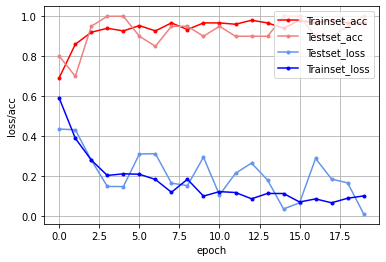

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

np.random.seed(3)
tf.compat.v1.set_random_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
       'train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       'test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history = finetune_model.fit_generator(
       train_generator,
       steps_per_epoch=30,
       epochs=20,
       validation_data=test_generator,
       validation_steps=4)

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
